In [17]:
!pip install gradio

In [18]:
import gradio as gr

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Chest xray filter image',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5000 files belonging to 10 classes.
Using 4000 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Chest xray filter image',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5000 files belonging to 10 classes.
Using 1000 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['Covid FL', 'Effusion FL', 'Fabrosis FL', 'Mass FL', 'Noduls FL', 'Normal FL', 'Pneumothorax FL', 'Tuberculosis FL', 'opacity FL', 'pneumonia FL']


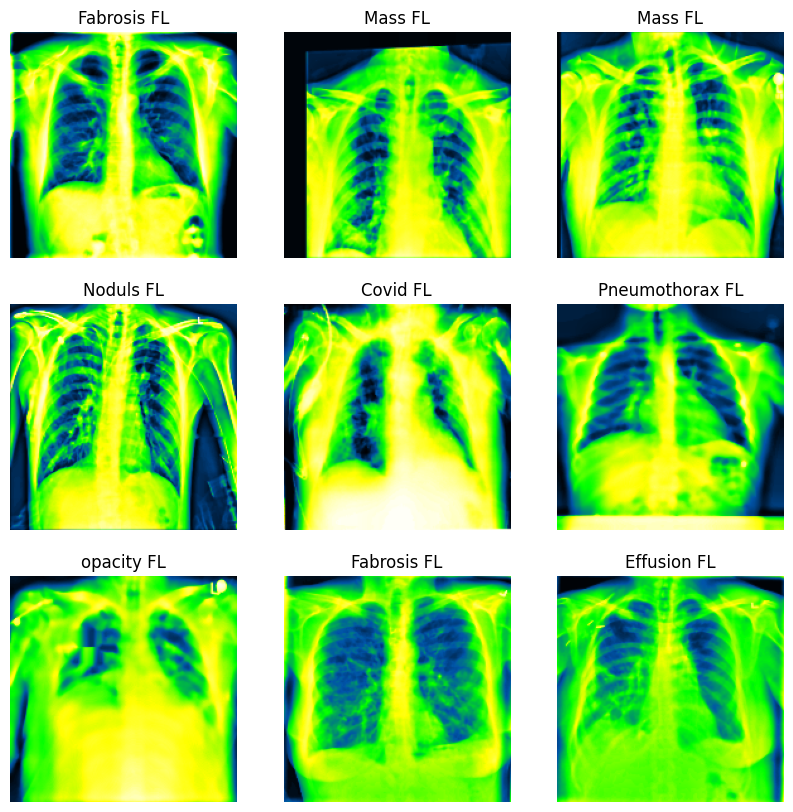

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs=4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/4
125/125 [==============================] - 27s 211ms/step - loss: 1.1791 - accuracy: 0.5620 - val_loss: 1.1279 - val_accuracy: 0.5710
Epoch 2/4
125/125 [==============================] - 27s 209ms/step - loss: 0.9178 - accuracy: 0.6555 - val_loss: 1.0854 - val_accuracy: 0.5810
Epoch 3/4
125/125 [==============================] - 27s 205ms/step - loss: 0.7316 - accuracy: 0.7315 - val_loss: 1.0829 - val_accuracy: 0.6080
Epoch 4/4
125/125 [==============================] - 27s 205ms/step - loss: 0.5140 - accuracy: 0.8087 - val_loss: 1.0928 - val_accuracy: 0.6310


In [39]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(10)}

In [46]:
#image = gr.inputs.Image(shape=(180,180))
#label = gr.outputs.Label(num_top_classes=3)

#gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')
# Define the Gradio interface


In [44]:
import gradio as gr
import numpy as np

# Ensure num_classes is defined correctly
num_classes = 10  # Adjust this to the number of classes in your model

# Example of a predict_image function (modify this as per your actual implementation)
def predict_image(img):
    # Your image prediction logic here
    # This is a dummy implementation that returns random labels
    import random
    labels = {f'class_{i}': random.random() for i in range(num_classes)}
    return labels

# Define the Gradio interface
image = gr.Image(type="numpy")  # Use 'type' to specify the input format
label = gr.Label(num_top_classes=num_classes)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0ea531c21615f03907.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0ea531c21615f03907.gradio.live
